In [1]:

import numpy as np

from matplotlib import pyplot as plt
from crawlab_toolbox import plotting as genplt

import os
from scipy.stats import describe

import matplotlib.colors as colors

from joblib import dump, load
import datetime

In [2]:

dateTime=  np.load('data/warmup-dateTime.npy',allow_pickle=True)
values = np.load('data/warmup-FFT.npy',allow_pickle=True)
rms = np.load('data/warmup-RMS.npy',allow_pickle=True)

In [3]:
def plot_spectrogram(
            time,
            spectrogram,
            frequencyInterval,
            size=(12,4),
            showplot = False,
            save_plot = False,
            transparent = False,
            folder = None,
            filename = 'Spectrogram',
            xlabelpad = 5,    
            ylabelpad = 5,   
            file_type='pdf',
            date_format='%I:00 %p, %b %d',
            xlabel = 'Time'
            ):

    yi = np.arange(-0.0, spectrogram.shape[0] * frequencyInterval,frequencyInterval)
    xi = np.linspace(0.0,1,spectrogram.shape[1]) * np.amax(time)

    X, Y = np.meshgrid(xi, yi)
    plt.figure(figsize=size)
    
    print(X.shape)
    print(Y.shape)
    print(spectrogram.shape)

    # Customize the axes
    ax = plt.gca()
    plt.pcolormesh(X,Y,spectrogram,cmap='cividis',norm=colors.LogNorm(vmin=np.amin(spectrogram),vmax=np.amax(spectrogram)))

    ax.tick_params(labelsize=18)

    cbar = plt.colorbar()
    cbar.set_label(r'\textbf{Spectrum (g RMS)}', rotation=270,labelpad=20)
    plt.ylabel(r'\textbf{Frequency (Hz)}', labelpad=ylabelpad,fontsize=22)
    plt.xlabel(r'\textbf{' + xlabel + '}', labelpad=xlabelpad,fontsize=22)

    plt.tight_layout(pad=1.2)

    if save_plot:
        if folder is not None:
            # Ensure that the folder we want to save to exists
            if not os.path.exists(folder):
                os.makedirs(folder)

            filename = folder + '/' + filename

        # Save the pdf of the plot    
        if file_type == 'png':
            plt.savefig('{}.png'\
                    .format(filename),transparent=transparent)             
        elif file_type == 'pdf':
            plt.savefig('{}.pdf'\
                    .format(filename))    
        elif file_type == 'svg':
            plt.savefig('{}.svg'\
                    .format(filename)) 

    if showplot:
        plt.show()

    # Clear the axes and figure
    plt.clf()
    plt.cla()
    plt.close()

In [4]:
ts = (dateTime - dateTime[0]) / datetime.timedelta(seconds=60)


(2049, 1105)
(2049, 1105)
(2049, 1105)


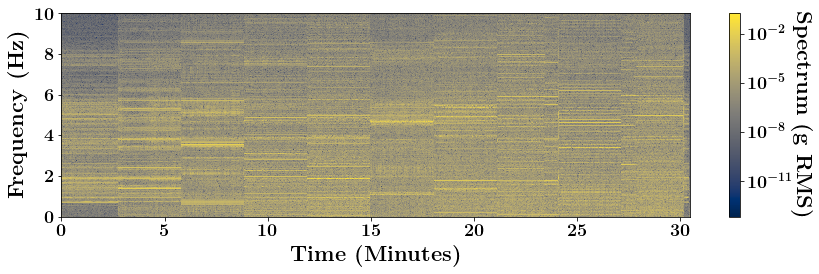

In [5]:
max_index = -1
frequencyInterval = 4.88281250
plot_spectrogram(
            ts,
            values[:,:].astype(float).T,
            frequencyInterval / 1000,
            size=(12,4),
            showplot = True,
            save_plot = True,
            transparent = True,
            folder = 'figures',
            filename = 'Warmup-Spectrogram',
            xlabelpad = 5,    
            ylabelpad = 5,   
            file_type='png',
#             date_format='%I:00 %p, %b %d',
            xlabel='Time (Minutes)'
            )

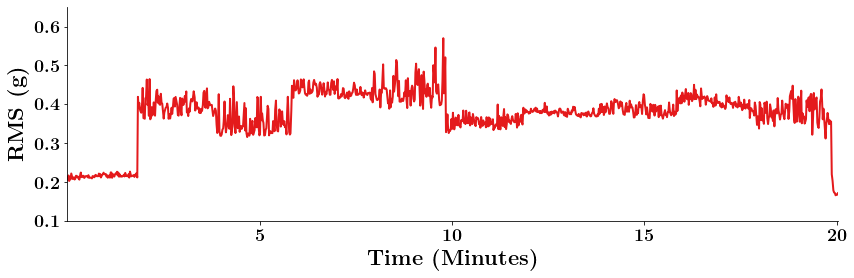

In [6]:
genplt.generate_plot(ts[:-2],rms[:-2],
                         [''],r'Time (Minutes)',r'RMS (g)',showplot=True,
                         template='wide',
                         ymax=0.2,
                         save_plot=True,
                         transparent=True,
                         num_col=2,
                         folder='figures',
                         filename='Warmup-RMS',
                         file_type='svg')
